In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\Logistic Regression Projects\\Project 2 - diabetes prediction\\diabetes2.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Target variable - Outcome

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of Outcome')

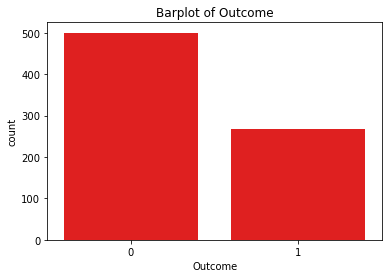

In [8]:
sns.countplot(df.Outcome, color = 'red')
plt.title('Barplot of Outcome')

# Pregnancies

In [9]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Barplot of Pregnancies')

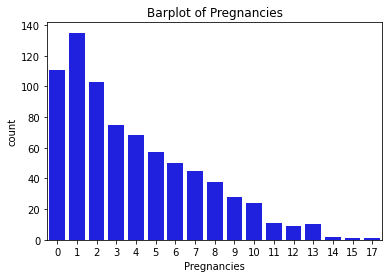

In [10]:
sns.countplot(df.Pregnancies, color = 'blue')
plt.title('Barplot of Pregnancies')

In [11]:
df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


In [12]:
#Hypothesis Testing
ct_Pregnancies = pd.crosstab(df.Outcome, df.Pregnancies)
chi2_contingency(ct_Pregnancies, correction = False)

(64.59480868723006,
 8.648349123362548e-08,
 16,
 array([[72.265625  , 87.890625  , 67.05729167, 48.828125  , 44.27083333,
         37.109375  , 32.55208333, 29.296875  , 24.73958333, 18.22916667,
         15.625     ,  7.16145833,  5.859375  ,  6.51041667,  1.30208333,
          0.65104167,  0.65104167],
        [38.734375  , 47.109375  , 35.94270833, 26.171875  , 23.72916667,
         19.890625  , 17.44791667, 15.703125  , 13.26041667,  9.77083333,
          8.375     ,  3.83854167,  3.140625  ,  3.48958333,  0.69791667,
          0.34895833,  0.34895833]]))

# Glucose

In [13]:
df.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Glucose')

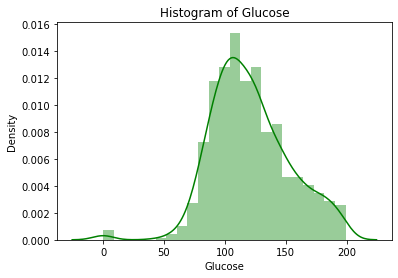

In [14]:
sns.distplot(df.Glucose, color = 'green')
plt.title('Histogram of Glucose')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Glucose')

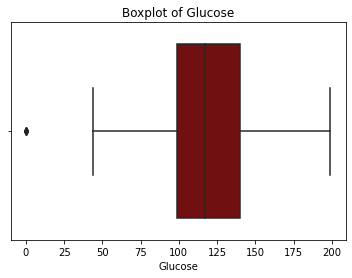

In [15]:
sns.boxplot(df.Glucose, color = 'maroon')
plt.title('Boxplot of Glucose')

In [16]:
import math
import scipy.stats as stats
from scipy import stats

In [17]:
iqr = stats.iqr(df['Glucose'])
iqr

41.25

In [18]:
q3=df['Glucose'].quantile(0.75)
q3

140.25

In [19]:
q1=df['Glucose'].quantile(0.25)
q1

99.0

In [20]:
upper = q3+(1.5*iqr)
upper

202.125

In [21]:
lower = q1-(1.5*iqr)
lower

37.125

In [22]:
df['Glucose'] = np.where(df['Glucose']<lower, lower, df['Glucose'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Glucose')

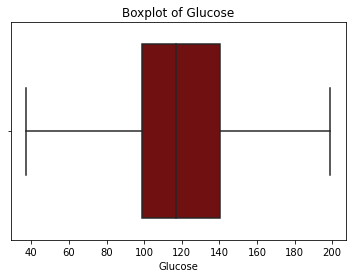

In [23]:
sns.boxplot(df.Glucose, color = 'maroon')
plt.title('Boxplot of Glucose')

# BloodPressure

In [24]:
df.BloodPressure.value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of BloodPressure')

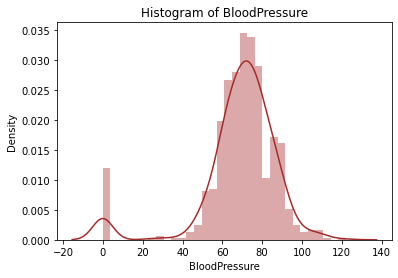

In [25]:
sns.distplot(df.BloodPressure, color = 'brown')
plt.title('Histogram of BloodPressure')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of BloodPressure')

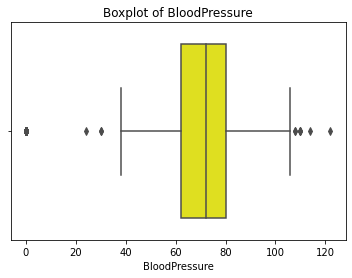

In [26]:
sns.boxplot(df.BloodPressure, color = 'yellow')
plt.title('Boxplot of BloodPressure')

In [27]:
iqr = stats.iqr(df['BloodPressure'])
iqr

18.0

In [28]:
q3=df['BloodPressure'].quantile(0.75)
q3

80.0

In [29]:
q1=df['BloodPressure'].quantile(0.25)
q1

62.0

In [30]:
upper = q3+(1.5*iqr)
upper

107.0

In [31]:
lower = q1-(1.5*iqr)
lower

35.0

In [32]:
df['BloodPressure'] = np.where(df['BloodPressure']>upper, upper, df['BloodPressure'])

In [33]:
df['BloodPressure'] = np.where(df['BloodPressure']<lower, lower, df['BloodPressure'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of BloodPressure')

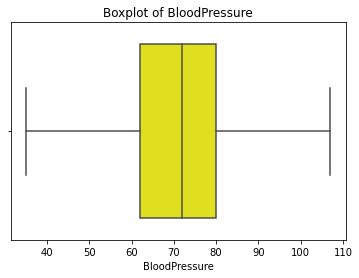

In [34]:
sns.boxplot(df.BloodPressure, color = 'yellow')
plt.title('Boxplot of BloodPressure')

# SkinThickness

In [35]:
df.SkinThickness.value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of SkinThickness')

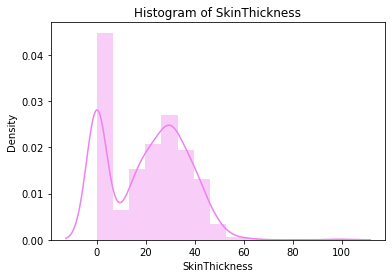

In [36]:
sns.distplot(df.SkinThickness, color = 'violet')
plt.title('Histogram of SkinThickness')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of SkinThickness')

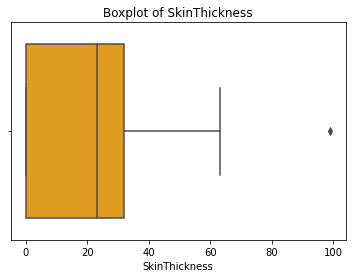

In [37]:
sns.boxplot(df.SkinThickness, color = 'orange')
plt.title('Boxplot of SkinThickness')

In [38]:
iqr = stats.iqr(df['SkinThickness'])
iqr

32.0

In [39]:
q3=df['SkinThickness'].quantile(0.75)
q3

32.0

In [40]:
q1=df['SkinThickness'].quantile(0.25)
q1

0.0

In [41]:
upper = q3+(1.5*iqr)
upper

80.0

In [42]:
lower = q1-(1.5*iqr)
lower

-48.0

In [43]:
df['SkinThickness'] = np.where(df['SkinThickness']>upper, upper, df['SkinThickness'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of SkinThickness')

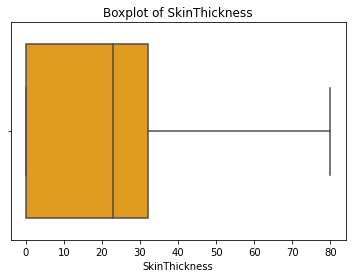

In [44]:
sns.boxplot(df.SkinThickness, color = 'orange')
plt.title('Boxplot of SkinThickness')

# Insulin

In [45]:
df.Insulin.value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Insulin')

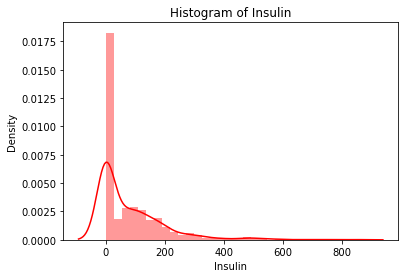

In [46]:
sns.distplot(df.Insulin, color = 'red')
plt.title('Histogram of Insulin')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Insulin')

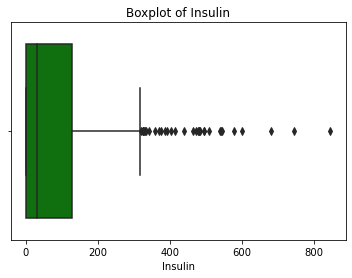

In [47]:
sns.boxplot(df.Insulin, color = 'green')
plt.title('Boxplot of Insulin')

In [48]:
iqr = stats.iqr(df['Insulin'])
iqr

127.25

In [49]:
q3=df['Insulin'].quantile(0.75)
q3

127.25

In [50]:
q1=df['Insulin'].quantile(0.25)
q1

0.0

In [51]:
upper = q3+(1.5*iqr)
upper

318.125

In [52]:
lower = q1-(1.5*iqr)
lower

-190.875

In [53]:
df['Insulin'] = np.where(df['Insulin']>upper, upper, df['Insulin'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Insulin')

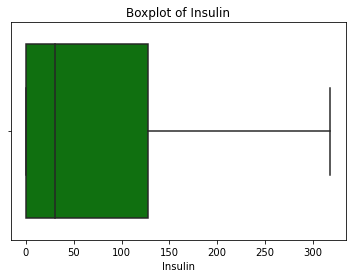

In [54]:
sns.boxplot(df.Insulin, color = 'green')
plt.title('Boxplot of Insulin')

# BMI

In [55]:
df.BMI.value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of BMI')

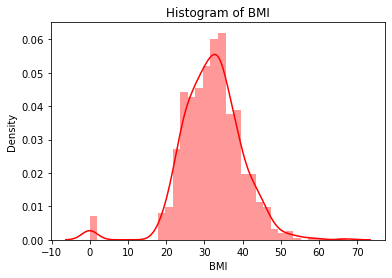

In [56]:
sns.distplot(df.BMI, color = 'red')
plt.title('Histogram of BMI')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of BMI')

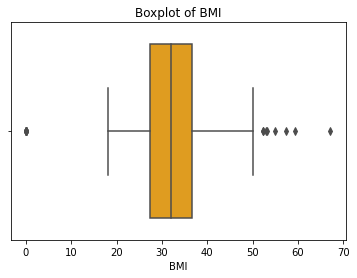

In [57]:
sns.boxplot(df.BMI, color = 'orange')
plt.title('Boxplot of BMI')

In [58]:
iqr = stats.iqr(df['BMI'])
iqr

9.3

In [59]:
q3=df['BMI'].quantile(0.75)
q3

36.6

In [60]:
q1=df['BMI'].quantile(0.25)
q1

27.3

In [61]:
upper = q3+(1.5*iqr)
upper

50.550000000000004

In [62]:
lower = q1-(1.5*iqr)
lower

13.35

In [63]:
df['BMI'] = np.where(df['BMI']>upper, upper, df['BMI'])

In [64]:
df['BMI'] = np.where(df['BMI']<lower, lower, df['BMI'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of BMI')

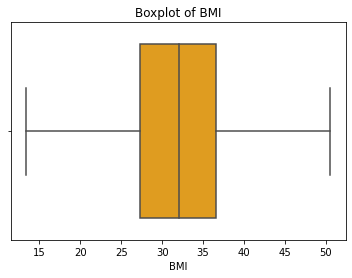

In [65]:
sns.boxplot(df.BMI, color = 'orange')
plt.title('Boxplot of BMI')

# DiabetesPedigreeFunction

In [66]:
df.DiabetesPedigreeFunction.value_counts()

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of DiabetesPedigreeFunction')

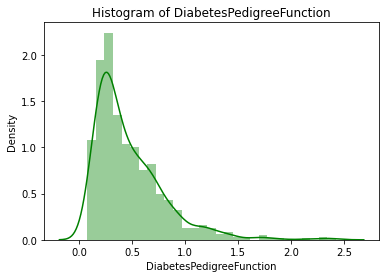

In [67]:
sns.distplot(df.DiabetesPedigreeFunction, color = 'green')
plt.title('Histogram of DiabetesPedigreeFunction')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of DiabetesPedigreeFunction')

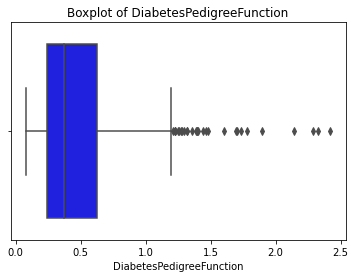

In [68]:
sns.boxplot(df.DiabetesPedigreeFunction, color = 'blue')
plt.title('Boxplot of DiabetesPedigreeFunction')

In [69]:
iqr = stats.iqr(df['DiabetesPedigreeFunction'])
iqr

0.38249999999999995

In [70]:
q3=df['DiabetesPedigreeFunction'].quantile(0.75)
q3

0.62625

In [71]:
q1=df['DiabetesPedigreeFunction'].quantile(0.25)
q1

0.24375

In [72]:
upper = q3+(1.5*iqr)
upper

1.2

In [73]:
lower = q1-(1.5*iqr)
lower

-0.32999999999999996

In [74]:
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']>upper, upper, df['DiabetesPedigreeFunction'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of DiabetesPedigreeFunction')

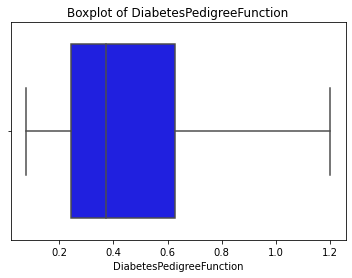

In [75]:
sns.boxplot(df.DiabetesPedigreeFunction, color = 'blue')
plt.title('Boxplot of DiabetesPedigreeFunction')

# Age

In [76]:
df.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Age')

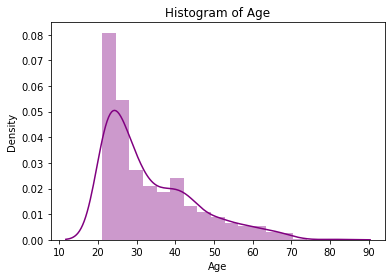

In [77]:
sns.distplot(df.Age, color = 'purple')
plt.title('Histogram of Age')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Age')

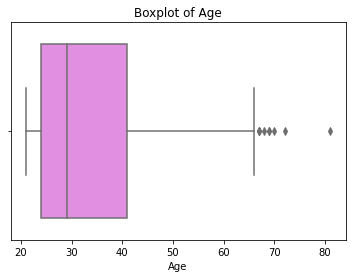

In [78]:
sns.boxplot(df.Age, color = 'violet')
plt.title('Boxplot of Age')

In [79]:
iqr = stats.iqr(df['Age'])
iqr

17.0

In [80]:
q3=df['Age'].quantile(0.75)
q3

41.0

In [81]:
q1=df['Age'].quantile(0.25)
q1

24.0

In [82]:
upper = q3+(1.5*iqr)
upper

66.5

In [83]:
lower = q1-(1.5*iqr)
lower

-1.5

In [84]:
df['Age'] = np.where(df['Age']>upper, upper, df['Age'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Age')

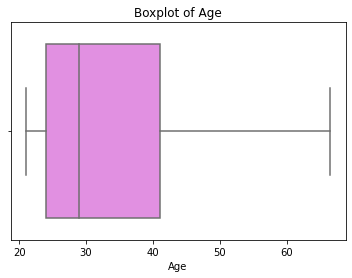

In [85]:
sns.boxplot(df.Age, color = 'violet')
plt.title('Boxplot of Age')

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

In [87]:
# x and y
x = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, df.columns == 'Outcome']

In [88]:
y.value_counts()

Outcome
0          500
1          268
dtype: int64

In [93]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# Random Forest

In [89]:
from sklearn import metrics

In [91]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn. ensemble import RandomForestClassifier

In [94]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

C:\Users\hp\AppData\Local\Temp\ipykernel_6828\2148472383.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier()

In [95]:
params={
    'n_estimators':[100,200,300],
    'max_features':['sqrt',0.25]
}

In [96]:
gd=GridSearchCV(rf,params)

In [97]:
gd.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed whe

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.25],
                         'n_estimators': [100, 200, 300]})

In [98]:
fr=gd.best_estimator_

In [99]:
fr

RandomForestClassifier(max_features='sqrt', n_estimators=200)

In [100]:
rf=RandomForestClassifier(n_estimators=200)

In [101]:
rf.fit(xtrain,ytrain)

C:\Users\hp\AppData\Local\Temp\ipykernel_6828\2224009558.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=200)

In [102]:
y_pred = rf.predict(xtest)

In [103]:
rf.score(xtest,ytest)

0.7727272727272727

In [104]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[76 11]
 [24 43]]


In [106]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(ytest,y_pred)

0.7727272727272727

In [108]:
#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        87
           1       0.80      0.64      0.71        67

    accuracy                           0.77       154
   macro avg       0.78      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [109]:
#ROC
y_pred_prob = rf.predict_proba(xtest)
fpr, tpr, thresholds =roc_curve(ytest, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) 
print(roc_auc) 

0.8695316520844056


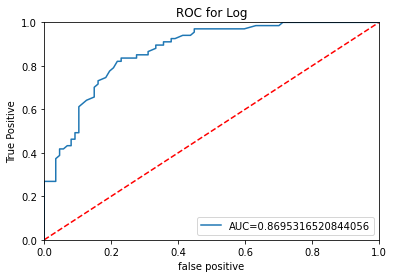

In [110]:
plt.title('ROC for Log')
plt.xlabel('false positive')
plt.ylabel('True Positive')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.legend(loc=4)
plt.show()

# KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample

In [112]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Initialize an empty list to store the cross-validation scores
cv_scores = []

# Loop over the candidate values of k
for k in k_values:
    # Create a KNN regressor with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate the cross-validation score for the current value of k
    scores = cross_val_score(knn, x, y)

    # Append the mean of the cross-validation scores to the list of scores
    cv_scores.append(np.mean(scores))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [115]:
# Find the index of the best value of k based on the cross-validation scores
best_index = np.argmax(cv_scores)

In [116]:
# Print the best value of k
print("Best value of k:", k_values[best_index])

Best value of k: 13


# Logistic Regression

In [117]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
y_pred=model.predict(xtest)

In [119]:
accuracy_score(ytest,y_pred)

0.7402597402597403

In [120]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[74 13]
 [27 40]]


In [121]:

#classification Report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        87
           1       0.75      0.60      0.67        67

    accuracy                           0.74       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.74      0.74      0.73       154

